# Do women in Canada earn less than men? Can you predict the average wage given historical data?

In [2]:
# Initial import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
Wages = pd.read_excel("./Dataset - Average Wages (1).xlsx")

## EDA

### Check data size, categories, cleanliness, etc.

In [12]:
Wages.head()

,Year,Geography,Type of work,Education level,Sex,Age group,Wages,Value
0,1997,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,5954.5
1,1998,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6060.1
2,1999,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6203.8
3,2000,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6427.6
4,2001,Canada,Both full- and part-time,"Total, all education levels",Male,15 years and over,Total employees,6520.2


In [9]:
Wages.tail()

,Year,Geography,Type of work,Education level,Sex,Age group,Wages,Value
633595,2012,British Columbia,Part-time,Above bachelor's degree,Female,55 years and over,Median weekly wage rate,522.50
633596,2013,British Columbia,Part-time,Above bachelor's degree,Female,55 years and over,Median weekly wage rate,461.55
633597,2014,British Columbia,Part-time,Above bachelor's degree,Female,55 years and over,Median weekly wage rate,497.52
633598,2015,British Columbia,Part-time,Above bachelor's degree,Female,55 years and over,Median weekly wage rate,480.80
633599,2016,British Columbia,Part-time,Above bachelor's degree,Female,55 years and over,Median weekly wage rate,692.37


In [38]:
Wages.shape

(633600, 8)

In [19]:
Wages.isna().sum()

Year               0
Geography          0
Type of work       0
Education level    0
Sex                0
Age group          0
Wages              0
Value              0
dtype: int64

In [13]:
print("Year:", Wages["Year"].unique())
print()
print("Geography:", Wages["Geography"].unique())
print()
print("Type of work:", Wages["Type of work"].unique())
print()
print("Education level:", Wages["Education level"].unique())
print()
print("Age group:", Wages["Age group"].unique())
print()
print("Wages:", Wages["Wages"].unique())

Year: [1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]

Geography: ['Canada' 'Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']

Type of work: ['Both full- and part-time' '   Full-time ' '   Part-time ']

Education level: ['Total, all education levels' '   0 - 8  years' '   Some high school'
 '   High school graduate' '   Some post-secondary'
 '   Post-secondary certificate or diploma'
 '    Trade certificate or diploma' '    Community college, CEGEP'
 '    University certificate below bachelors degree'
 '   University degree' "      Bachelor's degree"
 "      Above bachelor's degree"]

Age group: ['15 years and over ' '15-24 years' '20-34 years' '25 years and over'
 '25-34 years' '25-54 years' '25-64 years' '55 years and over']

Wages: ['Total employees' 'Average hourly wage rate' 'Average weekly wage rate'
 'Median hourly wag

In [6]:
Wages["Geography"].value_counts()

Nova Scotia                  57600
New Brunswick                57600
Ontario                      57600
Manitoba                     57600
Saskatchewan                 57600
Newfoundland and Labrador    57600
British Columbia             57600
Prince Edward Island         57600
Alberta                      57600
Canada                       57600
Quebec                       57600
Name: Geography, dtype: int64

In [7]:
Wages["Sex"].value_counts()

  Male      316800
  Female    316800
Name: Sex, dtype: int64

In [7]:
# Define a new datafram for Wages across the country (grouped by Sex and Age Group)
Canada_Total_Wages = Wages[Wages["Geography"] == "Canada"]

In [18]:
Canada_Total_Wages.shape

(57600, 8)

### Observe overall trends w/ plots

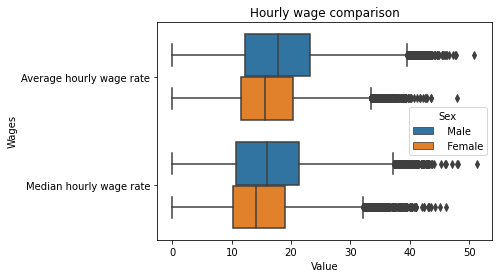

In [48]:
Wages_Hourly = Wages.loc[(Wages["Wages"] == "Average hourly wage rate") | (Wages["Wages"] == "Median hourly wage rate")]
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Hourly).set_title("Hourly wage comparison")
plt.show()

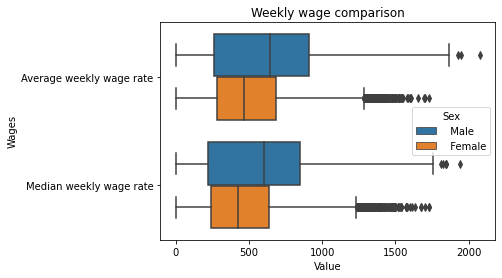

In [49]:
Wages_Weekly = Wages.loc[(Wages["Wages"] == "Average weekly wage rate") | (Wages["Wages"] == "Median weekly wage rate")]
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Weekly).set_title("Weekly wage comparison")
plt.show()

Note: Small differences in hourly wage compound into large differences in weekly wages

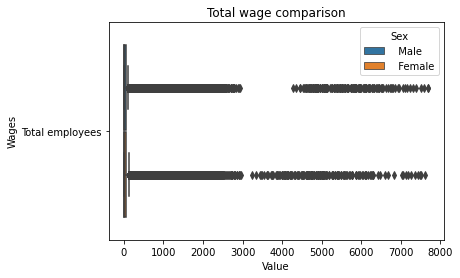

In [31]:
Wages_Total = Wages[(Wages["Wages"] == "Total employees")]
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Total).set_title("Total wage comparison")
plt.show()

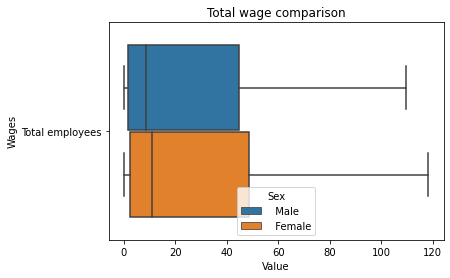

In [35]:
# Outliers had to be disabled because there were LOTS and it made the boxplot unreadable.
Wages_Total = Wages[(Wages["Wages"] == "Total employees")]
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Total, showfliers=False).set_title("Total wage comparison")
plt.show()

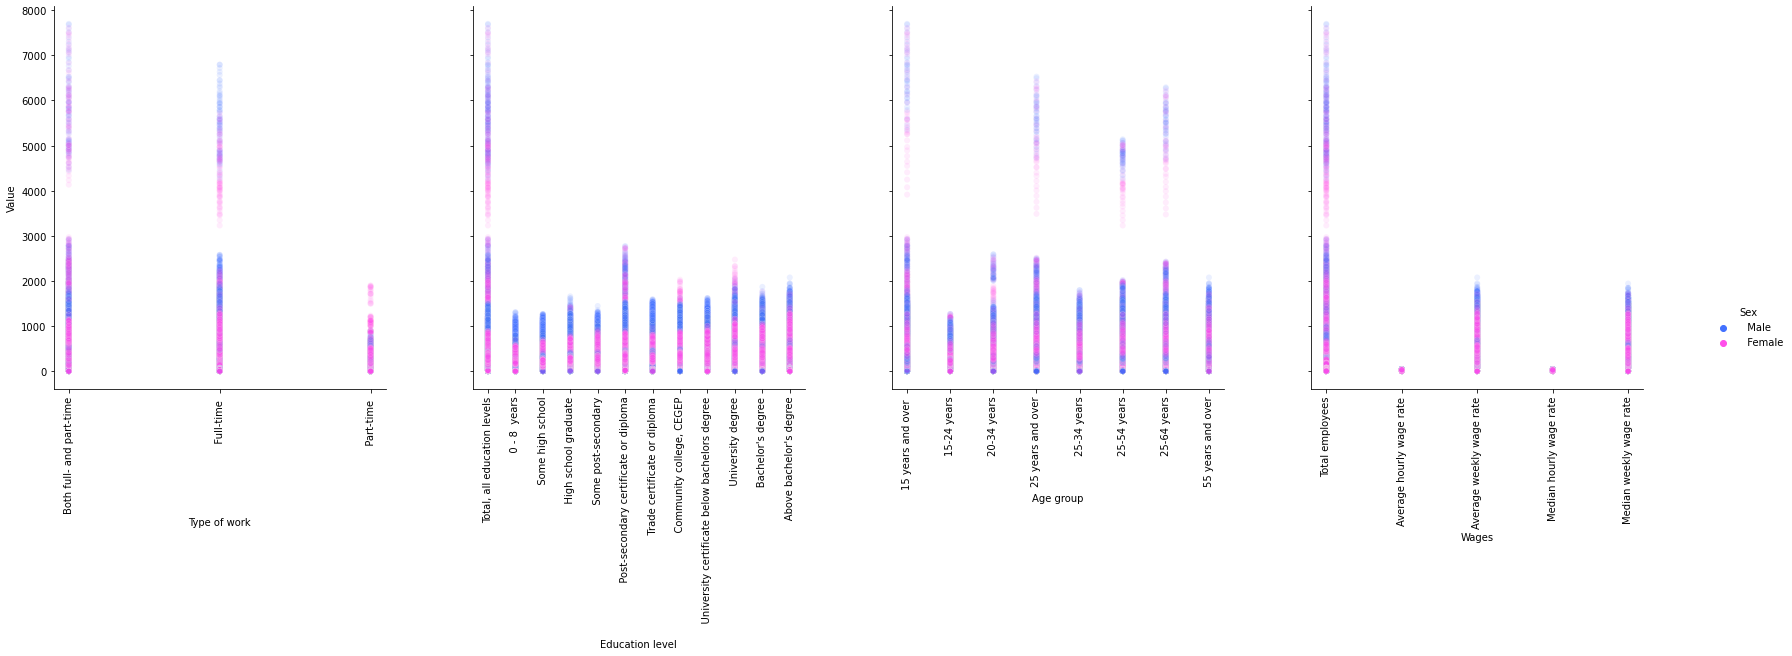

In [52]:
grid = sns.pairplot(
    data=Wages,
    hue="Sex",
    palette=sns.color_palette(["#4271ff", "#ff4fea"]),
    x_vars=["Type of work", "Education level", "Age group", "Wages"],
    y_vars=["Value"],
    diag_kind = None,
    height=6,
    plot_kws={'alpha':0.1},
)

# Rotate x-axis on each plot so they are readable
for ax in grid.axes.flat[:]:
    ax.tick_params(axis='x', labelrotation=90)

Note: Canada (Total Employees) was included in these plots, and likely is the reason many high-value points are seen

### Compare type of employment (Full- vs. Part-time)

In [51]:
# Type of Work has some interesting patterns - 
# Part-time is dominated by females, Full-time has males leading in wage values over females
Wages_Fulltime_Hourly = Wages_Hourly.loc[Wages_Hourly["Type of work"] == '   Full-time ']
Wages_Fulltime_Weekly = Wages_Weekly.loc[Wages_Weekly["Type of work"] == '   Full-time ']

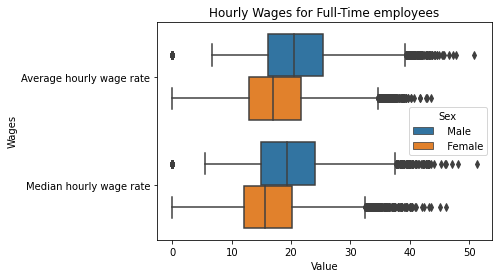

In [52]:
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Fulltime_Hourly).set_title("Hourly Wages for Full-Time employees")
plt.show()

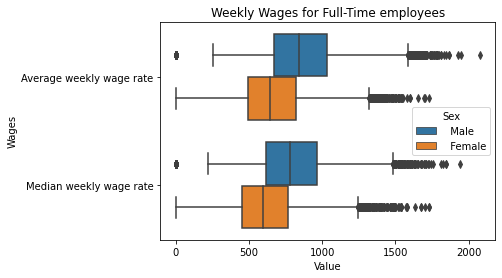

In [53]:
sns.boxplot(x="Value", y="Wages", hue="Sex", data=Wages_Fulltime_Weekly).set_title("Weekly Wages for Full-Time employees")
plt.show()